<a href="https://colab.research.google.com/github/shuvopodder/COVID19/blob/master/COVID19_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Forecast cases, deaths, and prediction (Shuvo Podder)

In [98]:
import pandas as pd
import numpy as np
import plotly.express as px

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import string
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns  
import matplotlib.cm as cm
import matplotlib.pyplot as plt
% matplotlib inline

from datetime import datetime

Import Datasets

In [99]:
data=pd.read_csv("https://opendata.ecdc.europa.eu/covid19/casedistribution/csv") 
#data=pd.read_excel("COVID-19-worldwide.xlsx") 

Checking Datasets

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26353 entries, 0 to 26352
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   dateRep                  26353 non-null  object 
 1   day                      26353 non-null  int64  
 2   month                    26353 non-null  int64  
 3   year                     26353 non-null  int64  
 4   cases                    26353 non-null  int64  
 5   deaths                   26353 non-null  int64  
 6   countriesAndTerritories  26353 non-null  object 
 7   geoId                    26247 non-null  object 
 8   countryterritoryCode     26289 non-null  object 
 9   popData2019              26289 non-null  float64
 10  continentExp             26353 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 2.2+ MB


In [ ]:
data.describe()

,day,month,year,cases,deaths,popData2019
count,26353.000000,26353.000000,26353.000000,26353.000000,26353.000000,2.628900e+04
mean,16.106515,4.180473,2019.997458,377.661253,18.916973,4.697303e+07
std,8.705274,1.553363,0.050359,2155.418932,121.757959,1.677347e+08
min,1.000000,1.000000,2019.000000,-2461.000000,-1918.000000,8.150000e+02
25%,9.000000,3.000000,2020.000000,0.000000,0.000000,1.919968e+06
50%,16.000000,4.000000,2020.000000,4.000000,0.000000,8.858775e+06
75%,24.000000,5.000000,2020.000000,67.000000,1.000000,3.194979e+07
max,31.000000,12.000000,2020.000000,54771.000000,4928.000000,1.433784e+09


In [ ]:
data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp
0,28/06/2020,28,6,2020,165,20,Afghanistan,AF,AFG,38041757.0,Asia
1,27/06/2020,27,6,2020,276,8,Afghanistan,AF,AFG,38041757.0,Asia
2,26/06/2020,26,6,2020,460,36,Afghanistan,AF,AFG,38041757.0,Asia
3,25/06/2020,25,6,2020,234,21,Afghanistan,AF,AFG,38041757.0,Asia
4,24/06/2020,24,6,2020,338,20,Afghanistan,AF,AFG,38041757.0,Asia


Modify Column Name 

In [100]:
data=data.rename(columns={"countriesAndTerritories" : "country",
                          "countryterritoryCode" : "countryCode"})

In [ ]:
data.head()

,dateRep,day,month,year,cases,deaths,country,geoId,countryCode,popData2019,continentExp
0,28/06/2020,28,6,2020,165,20,Afghanistan,AF,AFG,38041757.0,Asia
1,27/06/2020,27,6,2020,276,8,Afghanistan,AF,AFG,38041757.0,Asia
2,26/06/2020,26,6,2020,460,36,Afghanistan,AF,AFG,38041757.0,Asia
3,25/06/2020,25,6,2020,234,21,Afghanistan,AF,AFG,38041757.0,Asia
4,24/06/2020,24,6,2020,338,20,Afghanistan,AF,AFG,38041757.0,Asia


## **Worldwide**

Daily Cases Worldwide

In [ ]:
daily = pd.DataFrame()
daily = data.groupby(['year','month','day','dateRep']).agg({"cases":'sum',"deaths":sum})
daily = daily.reset_index()
daily.head(5)

,year,month,day,dateRep,cases,deaths
0,2019,12,31,31/12/2019,27,0
1,2020,1,1,01/01/2020,0,0
2,2020,1,2,02/01/2020,0,0
3,2020,1,3,03/01/2020,17,0
4,2020,1,4,04/01/2020,0,0


In [ ]:
fig = px.bar(x = daily["dateRep"],y = daily["cases"])
fig.update_layout(title = "Distribution of Number of Daily Cases",
                  xaxis_title = "Date", yaxis_title = "Number of Cases",)
fig.show()

Total number of Daily Deaths worldwide

In [ ]:
fig=px.bar(x=daily['dateRep'],y=daily["deaths"])
fig.update_layout(title="Distribution of Number of Daily Deaths",
                  xaxis_title="Date",yaxis_title="Number of Deaths")
fig.show()

All Affected Country List

In [ ]:
c = pd.DataFrame(data['country'].unique())
c.count()

0    210
dtype: int64

In [ ]:
data['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia_and_Herzegovina',
       'Botswana', 'Brazil', 'British_Virgin_Islands',
       'Brunei_Darussalam', 'Bulgaria', 'Burkina_Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape_Verde',
       'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia',
       'Cuba', 'Curaçao', 'Cyprus', 'Czechia',
       'Democratic_Republic_of_the_Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt',
       'El_Salvador', 'Equatorial_Guinea', 'Eri

Affected countries in wordcloud

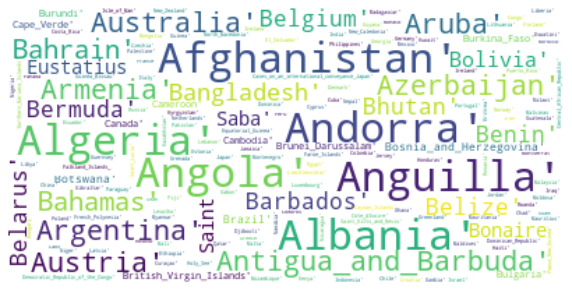

In [ ]:
wordcloud_country = WordCloud(background_color="white", max_font_size=30, 
                              max_words=500).generate(str(data['country'].unique()))
plt.figure(figsize=(10,20))
plt.imshow(wordcloud_country,interpolation='bilinear')
plt.axis('off')
plt.show()

Top Infected Country

In [ ]:
grouped_country = data.groupby(['country']).agg({"cases":'sum',"deaths":'sum'} ,ignore_index=True)
grouped_country= grouped_country.sort_values(by='cases')
grouped_country = grouped_country.reset_index()
#grouped_country=grouped_country.tail(10).reset_index()
fig=px.bar(x = grouped_country['country'].tail(10),y = grouped_country["cases"].tail(10))
fig.update_layout(title = "Top Ten Afftected Countries",
                  xaxis_title = "Country",yaxis_title = "Number of Cases",)
fig.show()

Highest Deaths Troll

In [ ]:
death_troll= grouped_country.sort_values(by='deaths')
death_troll = death_troll.reset_index() 
fig=px.bar(x = death_troll['country'].tail(10),y = death_troll["deaths"].tail(10))
fig.update_layout(title = "Top Ten Countries with deaths Troll",
                  xaxis_title = "Country",yaxis_title = "Number of Cases",)
fig.show()

Lowest infected countries are

In [ ]:
grouped_country['country'].head(10)

0                             Anguilla
1    Bonaire, Saint Eustatius and Saba
2               British_Virgin_Islands
3                           Montserrat
4                     Papua_New_Guinea
5                           Seychelles
6                             Holy_See
7          Falkland_Islands_(Malvinas)
8                            Greenland
9                Saint_Kitts_and_Nevis
Name: country, dtype: object

Infection Area Wise

In [ ]:
data['continentExp'].unique()

array(['Asia', 'Europe', 'Africa', 'America', 'Oceania', 'Other'],
      dtype=object)

In [ ]:
#Asia 
asia=data[data['continentExp']=='Asia'] 
asia=asia.groupby(['year','month','day','dateRep']).agg({"cases":'sum',"deaths":'sum'})#test
asia=asia.reset_index()

asia=asia.sort_values(by=['year','month','day'])

fig=px.bar(x=asia['dateRep'],y=asia["cases"])
fig.update_layout(title="Distribution of Number of Daily Cases Asia",
                  xaxis_title="Date",yaxis_title="Number of Cases",)
fig.show()

In [ ]:
#Europe
europe=data[data['continentExp']=='Europe']
europe=europe.sort_values(by=['month','day'])

europe=europe.groupby(['year','month','day','dateRep']).agg({"cases":'sum',"deaths":'sum'})#test
europe=europe.reset_index()

europe=europe.sort_values(by=['year','month','day'])

fig=px.bar(x=europe['dateRep'],y=europe["cases"])
fig.update_layout(title="Distribution of Number of Daily Cases Europe",
                  xaxis_title="Date",yaxis_title="Number of Cases",)
fig.show()

Asia vs Europe

In [ ]:
fig = make_subplots(rows = 2, cols = 1,subplot_titles = ("Asia", "Europe"))
fig.add_trace(
    go.Scatter(x=asia['dateRep'], y=asia['cases'],name='Asia'),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=europe['dateRep'] , y=europe['cases'],name="Europe"),
    row=2, col=1
)
fig.update_layout(height=1000,legend=dict(x=-0.1,y=1.2,traceorder="normal"))
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_yaxes(title_text="Cases", row=1, col=1)
fig.update_xaxes(title_text="Date", row=1, col=2)
fig.update_yaxes(title_text="Europe", row=1, col=2)
fig.show()

In [ ]:
bd=data[data['country']=='Bangladesh']
bd=bd.sort_values(by=['year','month','day'])
bd

,dateRep,day,month,year,cases,deaths,country,geoId,countryCode,popData2019,continentExp
2168,09/03/2020,9,3,2020,3,0,Bangladesh,BD,BGD,163046173.0,Asia
2167,15/03/2020,15,3,2020,0,0,Bangladesh,BD,BGD,163046173.0,Asia
2166,17/03/2020,17,3,2020,2,0,Bangladesh,BD,BGD,163046173.0,Asia
2165,18/03/2020,18,3,2020,3,0,Bangladesh,BD,BGD,163046173.0,Asia
2164,19/03/2020,19,3,2020,2,0,Bangladesh,BD,BGD,163046173.0,Asia
...,...,...,...,...,...,...,...,...,...,...,...
2067,24/06/2020,24,6,2020,3412,43,Bangladesh,BD,BGD,163046173.0,Asia
2066,25/06/2020,25,6,2020,3462,37,Bangladesh,BD,BGD,163046173.0,Asia
2065,26/06/2020,26,6,2020,3946,39,Bangladesh,BD,BGD,163046173.0,Asia
2064,27/06/2020,27,6,2020,3868,40,Bangladesh,BD,BGD,163046173.0,Asia


Infection Rate In Bangladesh

In [ ]:
fig=px.bar(x=bd['dateRep'],y=bd["cases"])
fig.update_layout(title="Distribution of Number of Daily Cases Bangladesh",
                  xaxis_title="Date",yaxis_title="Number of Cases",)
fig.show()

In [ ]:
def do(name):
  user=data[data['country']==name]
  user=user.sort_values(by=['year','month','day']) 
  fig=px.bar(x=user['dateRep'],y=user["cases"])
  fig.update_layout(title="Distribution of Number of Active Cases "+name,
                  xaxis_title="Date",yaxis_title="Number of Cases",)
  return fig;

In [ ]:
sk=data[data['country']=='South_Korea']
sk=sk.sort_values(by=['year','month','day']) 
fig=px.bar(x=sk['dateRep'],y=sk["cases"])
fig.update_layout(title="Distribution of Number of Daily Cases South Korea",
                  xaxis_title="Date",yaxis_title="Number of Cases",)
fig.show()

View Report by user input country

In [ ]:
str=input()
obj=do(str)
obj.show()

South_Korea


In [ ]:
us=data[data['country']=='United_States_of_America']
us=us.sort_values(by=['year','month','day'])

fig=px.bar(x=us['dateRep'],y=us["cases"])
fig.update_layout(title="Distribution of Number of Daily Cases USA",
                  xaxis_title="Date",yaxis_title="Number of Cases",)
fig.show()

In [ ]:
cn=data[data['country']=='China']
cn=cn.sort_values(by=['year','month','day'])

fig=px.bar(x=cn['dateRep'],y=cn["cases"])
fig.update_layout(title="Distribution of Number of Daily Cases China",
                  xaxis_title="Date",yaxis_title="Number of Cases",)
fig.show()

## USER INPUT

This user inpput take for next report.

In [ ]:
#uncomment the code below and check the country name correctly
data['country'].unique()

In [101]:
print("Please input the country name which one you like to show next result")
name=input()

Please input the country name which one you like to show next result
South_Korea


In [ ]:

m=data[data['country']==name]
m=m.sort_values(by=['year','month','day'])
m["dateRep"]=pd.to_datetime(m["dateRep"])
datewise_m=m.groupby(["dateRep"]).agg({"cases":'sum',"deaths":'sum' })
datewise_m["Days Since"]=datewise_m.index-datewise_m.index.min()
datewise_m["WeekOfYear"]=datewise_m.index.weekofyear

week_num=[]
cases=[]
deaths=[] 
w=1
for i in list(datewise_m["WeekOfYear"].unique()):
    cases.append(datewise_m[datewise_m["WeekOfYear"]==i]["cases"].iloc[-1])
    deaths.append(datewise_m[datewise_m["WeekOfYear"]==i]["deaths"].iloc[-1]) 
    week_num.append(w)
    w=w+1

fig=go.Figure()
fig.add_trace(go.Scatter(x=week_num, y=cases,
                    mode='lines+markers',
                    name='Weekly Growth of Confirmed Cases'))
fig.add_trace(go.Scatter(x=week_num, y=deaths,
                    mode='lines+markers',
                    name='Weekly No of Deaths'))
 
fig.update_layout(title="Weekly Growth of Cases and Deaths Rate in "+name,
                 xaxis_title="Week Number",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [ ]:
fig=go.Figure()

#fig.add_trace(go.Scatter(x=bd['dateRep'], y=bd['cases'],mode='lines+markers',name='Bangladesh'))
fig.add_trace(go.Scatter(x=sk['dateRep'], y=sk['cases'],
                    mode='lines+markers',
                    name='South Korea'))
fig.add_trace(go.Scatter(x=cn['dateRep'], y=cn['cases'],
                    mode='lines+markers',
                    name='China'))
fig.add_trace(go.Scatter(x=us['dateRep'], y=us['cases'],
                    mode='lines+markers',
                    name='USA'))
fig.update_layout(title="Growth of China,South Korea and USA",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [ ]:
datewise_m["Mortality Rate"]=(datewise_m["deaths"]/datewise_m["cases"])*100
  
print("Average Mortality Rate",datewise_m["Mortality Rate"].mean())
  
fig = go.Figure()
fig.add_trace(
    go.Scatter(x=datewise_m.index, y=(datewise_m["deaths"]/datewise_m["cases"])*100,name="Mortality Rate") 
)
fig.update_layout(height=500,legend=dict(x=-0.1,y=1.2,traceorder="normal"))
fig.update_xaxes(title_text="Date" )
fig.update_yaxes(title_text="Mortality Rate " ) 
fig.show()

Average Mortality Rate 5.285667099019435


## Prediction


In [102]:
data["dateRep"]=pd.to_datetime(data["dateRep"])
data 

,dateRep,day,month,year,cases,deaths,country,geoId,countryCode,popData2019,continentExp
0,2020-06-28,28,6,2020,165,20,Afghanistan,AF,AFG,38041757.0,Asia
1,2020-06-27,27,6,2020,276,8,Afghanistan,AF,AFG,38041757.0,Asia
2,2020-06-26,26,6,2020,460,36,Afghanistan,AF,AFG,38041757.0,Asia
3,2020-06-25,25,6,2020,234,21,Afghanistan,AF,AFG,38041757.0,Asia
4,2020-06-24,24,6,2020,338,20,Afghanistan,AF,AFG,38041757.0,Asia
...,...,...,...,...,...,...,...,...,...,...,...
26348,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa
26349,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa
26350,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa
26351,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa


In [103]:
grouped_country = data.groupby(["country","dateRep","year","month","day"]).agg({"cases":'sum' ,"deaths":'sum'})
grouped_country= grouped_country.reset_index()
grouped_country = grouped_country[grouped_country['country']==name]
grouped_country

,country,dateRep,year,month,day,cases,deaths
22245,South_Korea,2019-12-31,2019,12,31,0,0
22246,South_Korea,2020-01-01,2020,1,1,0,0
22247,South_Korea,2020-01-02,2020,2,1,5,0
22248,South_Korea,2020-01-03,2020,3,1,595,1
22249,South_Korea,2020-01-04,2020,4,1,0,0
...,...,...,...,...,...,...,...
22421,South_Korea,2020-12-02,2020,2,12,0,0
22422,South_Korea,2020-12-03,2020,3,12,114,6
22423,South_Korea,2020-12-04,2020,4,12,62,6
22424,South_Korea,2020-12-05,2020,5,12,27,2


In [139]:
#Grouping datewise
datewise=data.groupby(["dateRep","year","month","day"]).agg({"cases":'sum',"deaths":'sum' })
datewise=datewise.reset_index();
datewise = datewise.sort_values(by=['year','month','day'])
datewise=datewise.set_index("dateRep")
datewise["days_num"]=datewise.index-datewise.index.min()
datewise 

,year,month,day,cases,deaths,days_num
dateRep,,,,,,
2019-12-31,2019,12,31,27,0,0 days
2020-01-01,2020,1,1,0,0,1 days
2020-02-01,2020,1,2,0,0,32 days
2020-03-01,2020,1,3,17,0,61 days
2020-04-01,2020,1,4,0,0,92 days
...,...,...,...,...,...,...
2020-06-24,2020,6,24,165799,5577,176 days
2020-06-25,2020,6,25,171237,5194,177 days
2020-06-26,2020,6,26,181511,6716,178 days


In [140]:
datewise["Days Since"]=datewise.index-datewise.index[0]
datewise["Days Since"]=datewise["Days Since"].dt.days
datewise=datewise.drop(['year','month','day'],axis=1)#
datewise=datewise.sort_values(by=["Days Since"]) #
datewise

,cases,deaths,days_num,Days Since
dateRep,,,,
2019-12-31,27,0,0 days,0
2020-01-01,0,0,1 days,1
2020-01-02,2120,46,2 days,2
2020-01-03,1819,58,3 days,3
2020-01-04,73404,4622,4 days,4
...,...,...,...,...
2020-12-02,2072,97,337 days,337
2020-12-03,7662,326,338 days,338
2020-12-04,80442,5989,339 days,339


In [129]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm
from statsmodels.tsa.api import Holt,SimpleExpSmoothing,ExponentialSmoothing
from fbprophet import Prophet
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.tsa.stattools import adfuller
!pip install pyramid-arima
from pyramid.arima import auto_arima
std=StandardScaler()

In [141]:
train_ml=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.95):]
model_scores=[]
lin_reg=LinearRegression(normalize=True)
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["cases"]).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [142]:
prediction_valid_linreg=lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

In [143]:
model_scores.append(np.sqrt(mean_squared_error(valid_ml["cases"],prediction_valid_linreg)))
print("Root Mean Square Error for Linear Regression: ",np.sqrt(mean_squared_error(valid_ml["cases"],prediction_valid_linreg)))

Root Mean Square Error for Linear Regression:  77764.0324634305


In [144]:
plt.figure(figsize=(11,6))
prediction_linreg=lin_reg.predict(np.array(datewise["Days Since"]).reshape(-1,1))
linreg_output=[]
for i in range(prediction_linreg.shape[0]):
    linreg_output.append(prediction_linreg[i][0])

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["cases"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=datewise.index, y=linreg_output,
                    mode='lines',name="Linear Regression Best Fit Line",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Confirmed Cases Linear Regression Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 792x432 with 0 Axes>

In [145]:
train_ml=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.95):]
poly = PolynomialFeatures(degree = 2)
train_poly=poly.fit_transform(np.array(train_ml["Days Since"]).reshape(-1,1))
valid_poly=poly.fit_transform(np.array(valid_ml["Days Since"]).reshape(-1,1))
y=train_ml["cases"]
linreg=LinearRegression(normalize=True)
linreg.fit(train_poly,y)
prediction_poly=linreg.predict(valid_poly)
rmse_poly=np.sqrt(mean_squared_error(valid_ml["cases"],prediction_poly))
model_scores.append(rmse_poly)
print("Root Mean Squared Error for Polynomial Regression: ",rmse_poly)

Root Mean Squared Error for Polynomial Regression:  74542.43767430047


In [146]:
comp_data=poly.fit_transform(np.array(datewise["Days Since"]).reshape(-1,1))
plt.figure(figsize=(11,6))
predictions_poly=linreg.predict(comp_data)

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["cases"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=datewise.index, y=predictions_poly,
                    mode='lines',name="Polynomial Regression Best Fit",
                    line=dict(color='black', dash='dot')))

fig.update_layout(title="Confirmed Cases Polynomial Regression Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 792x432 with 0 Axes>

References:
https://data.europa.eu/euodp/en/data/dataset/covid-19-coronavirus-data/resource/260bbbde-2316-40eb-aec3-7cd7bfc2f590